In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 사용 함수

In [4]:
# 한글 패치 진행

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [5]:
# 파이차트 만들기 함수

def make_pie_chart(df_list,colname = "연령대"):

    fig, ax = plt.subplots(1,len(df_list),figsize = (15,5))

    for i, df in enumerate(df_list):
        age_counts = df[[colname]].value_counts().head(10)
        labels = age_counts.index.tolist()
        sizes = age_counts.values

        ax[i].pie(sizes,
           labels = labels,
           #explode=explode,
           autopct = '%1.1f%%',
           shadow = True, startangle= 90)
        ax[i].set_title(f"{2021 + i} {colname} 파이차트")

    plt.show()

In [6]:
# Butterfly Plot 그리기 함수

def make_butterfly_chart(df1, df2, year = 2020):

    # Butterfly Chart

    plt.figure(figsize = (10,6))

    # 데이터 그리기
    sns.barplot(data = df1, y = '가맹점업종명', x = 'count' , color = 'BLue', label = '2030', errorbar=None)
    sns.barplot(data = df2, y = '가맹점업종명', x = 'count' , color = 'Red', label = '4050', errorbar=None ,estimator = lambda x: -sum(x))

    # 축과 레이블 설정
    plt.axvline(0, color = 'grey', linestyle = '--')
    plt.axis('tight')
    plt.subplots_adjust(left = 0.1, right = 0.9, top = 0.9, bottom = 0.1)

    plt.gca().spines['top'].set_visible(False)   
    plt.gca().spines['right'].set_visible(False) 
    plt.gca().spines['left'].set_visible(False)    
    plt.gca().spines['bottom'].set_visible(False)   

    plt.title(f"{year}년 세대별 소비 횟수 비교", fontsize=17)
    plt.show()

In [7]:
# 두 집단의 범주 차이 비교

# 나이대로 데이터 분할

#capital_2030 = capital_data[capital_data['연령대'].isin(['20대', '30대'])]
#capital_4050 = capital_data[capital_data['연령대'].isin(['40대', '50대'])]

def age_compare_(category_col_1, category_col_2, category_name, df1, df2, hue = '성별'):

    fig, ax = plt.subplots(1,2,figsize = (14,6))

    sns.barplot(x = df1[category_col_1][df1[category_col_2] == category_name].value_counts(normalize=True).head(10).index,
                y = df1[category_col_1][df1[category_col_2] == category_name].value_counts(normalize=True).head(10).values,
                ax = ax[0], #hue=df1[hue][df1[category_col_2] == category_name].head(10) if hue else None
                )
    #ax[0].pick_params(axis = 'x', rotation = 45)
    ax[0].set_title(f"{category_col_2}, {category_name} Barplot Of df1")

    sns.barplot(x = df2[category_col_1][df2[category_col_2] == category_name].value_counts(normalize=True).head(10).index,
                y = df2[category_col_1][df2[category_col_2] == category_name].value_counts(normalize=True).head(10).values,
                ax = ax[1], #hue=df2[hue][df2[category_col_2] == category_name].head(10) if hue else None
                )
    #ax[1].pick_params(axis = 'x', rotation = 45)
    ax[1].set_title(f"{category_col_1}, {category_name} Barplot Of df2")

    plt.tight_layout()
    plt.show()

In [8]:
data = pd.read_csv('sampled_data/final_data.csv')
data['거래년월'] = pd.to_datetime(data['거래년월'], format='%Y-%m-%d')
#data = data.drop('Unnamed: 0', axis= 1)

In [9]:
data_tmp = pd.read_csv('sampled_data/capital_data.csv')
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841276 entries, 0 to 841275
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  841276 non-null  int64 
 1   거래년월        841276 non-null  object
 2   고객ID        841276 non-null  int64 
 3   가맹점업종명      841276 non-null  object
 4   가맹점_광역시도    841276 non-null  object
 5   가맹점_시군구     841276 non-null  object
 6   승인건수        841276 non-null  object
 7   승인금액        841276 non-null  int64 
 8   연령대         841276 non-null  object
 9   성별          841276 non-null  object
 10  고객등급        841276 non-null  object
 11  자택_시도       841276 non-null  object
 12  자택_시군구      841276 non-null  object
 13  승인건수_수치화    841276 non-null  int64 
 14  거래년월_분기     841276 non-null  int64 
 15  거래월         841276 non-null  object
 16  년도          841276 non-null  int64 
 17  가맹점업종명_범주화  841276 non-null  object
dtypes: int64(6), object(12)
memory usage: 115.5+ MB


In [10]:
seoul_pop = pd.read_csv('C:/Users/campus3S031/Desktop/iM뱅크 프로젝트용 데이터/파생 데이터/등록인구_20241105141249.csv')
gyeonggy_pop = pd.read_csv('C:/Users/campus3S031/Desktop/iM뱅크 프로젝트용 데이터/파생 데이터/시군별_세대_및_인구_20241105142246.csv', encoding = 'cp949')

In [11]:
# seoul_pop의 컬럼명 변경
seoul_pop = seoul_pop.rename(columns={'시': '시도', '구': '시군구'})
gyeonggy_pop = gyeonggy_pop.rename(columns={'자택_시도': '시도', '자택_시군구': '시군구'})
total_pop = pd.concat([seoul_pop, gyeonggy_pop], axis = 0)
total_pop

,시도,시군구,인구,년도
0,서울특별시,종로구,144683,2021
1,서울특별시,중구,122499,2021
2,서울특별시,용산구,222953,2021
3,서울특별시,성동구,285990,2021
4,서울특별시,광진구,339996,2021
...,...,...,...,...
121,경기도,구리시,188634,2023
122,경기도,포천시,157992,2023
123,경기도,동두천시,92414,2023
124,경기도,가평군,63488,2023


In [12]:
data_tmp.columns

Index(['Unnamed: 0', '거래년월', '고객ID', '가맹점업종명', '가맹점_광역시도', '가맹점_시군구', '승인건수',
       '승인금액', '연령대', '성별', '고객등급', '자택_시도', '자택_시군구', '승인건수_수치화', '거래년월_분기',
       '거래월', '년도', '가맹점업종명_범주화'],
      dtype='object')

In [13]:
total_pop.columns

Index(['시도', '시군구', '인구', '년도'], dtype='object')

In [14]:
data_tmp['가맹점_시군구'] = data_tmp['가맹점_시군구'].replace({
    '부천시 원미구': '부천시',
    '부천시 오정구': '부천시',
    '부천시 소사구': '부천시'
})

data_tmp['자택_시군구'] = data_tmp['자택_시군구'].replace({
    '부천시 원미구': '부천시',
    '부천시 오정구': '부천시',
    '부천시 소사구': '부천시'
})

In [15]:
# 데이터 전처리 및 병합 - 가맹점 기준 인구 병합
# total_pop의 컬럼명 변경
total_pop = total_pop.rename(columns={'시도': '가맹점_광역시도', '시군구': '가맹점_시군구', '인구': '가맹점_인구'})

# 데이터 병합
merged_data = data_tmp.merge(total_pop, 
                        on=['가맹점_광역시도', '가맹점_시군구', '년도'],
                        how='left')

# 결과 확인
print("\n병합 결과:")
merged_data.head(1)


병합 결과:


,Unnamed: 0,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,연령대,성별,고객등급,자택_시도,자택_시군구,승인건수_수치화,거래년월_분기,거래월,년도,가맹점업종명_범주화,가맹점_인구
0,0,2021-01-01,8219466848,CATV홈쇼핑,서울특별시,강동구,5번이하,50000,50대,여,일반등급,대구광역시,달서구,1,1,JAN,2021,서비스_및_여가,462664


In [16]:
# 데이터 전처리 및 병합 - 자택 기준 인구 병합
# total_pop의 컬럼명 변경

total_pop_2 = total_pop.rename(columns={'가맹점_광역시도': '자택_시도', '가맹점_시군구': '자택_시군구', '가맹점_인구': '자택_인구'})

# 데이터 병합
merged_data = merged_data.merge(total_pop_2, 
                        on=['자택_시도', '자택_시군구', '년도'],
                        how='left')

merged_data.fillna(0, inplace=True)

# 결과 확인
print("\n병합 결과:")
merged_data.head(1)


병합 결과:


,Unnamed: 0,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,연령대,성별,고객등급,자택_시도,자택_시군구,승인건수_수치화,거래년월_분기,거래월,년도,가맹점업종명_범주화,가맹점_인구,자택_인구
0,0,2021-01-01,8219466848,CATV홈쇼핑,서울특별시,강동구,5번이하,50000,50대,여,일반등급,대구광역시,달서구,1,1,JAN,2021,서비스_및_여가,462664,0.0


In [17]:
merged_data.drop(['Unnamed: 0'], axis=1, inplace=True)
data = merged_data

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841276 entries, 0 to 841275
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   거래년월        841276 non-null  object 
 1   고객ID        841276 non-null  int64  
 2   가맹점업종명      841276 non-null  object 
 3   가맹점_광역시도    841276 non-null  object 
 4   가맹점_시군구     841276 non-null  object 
 5   승인건수        841276 non-null  object 
 6   승인금액        841276 non-null  int64  
 7   연령대         841276 non-null  object 
 8   성별          841276 non-null  object 
 9   고객등급        841276 non-null  object 
 10  자택_시도       841276 non-null  object 
 11  자택_시군구      841276 non-null  object 
 12  승인건수_수치화    841276 non-null  int64  
 13  거래년월_분기     841276 non-null  int64  
 14  거래월         841276 non-null  object 
 15  년도          841276 non-null  int64  
 16  가맹점업종명_범주화  841276 non-null  object 
 17  가맹점_인구      841276 non-null  int64  
 18  자택_인구       841276 non-null  float64
dtypes:

In [19]:
data.to_csv('sampled_data/capital_data_1108.csv', index=False)

# 데이터 확인

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841276 entries, 0 to 841275
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   거래년월        841276 non-null  object 
 1   고객ID        841276 non-null  int64  
 2   가맹점업종명      841276 non-null  object 
 3   가맹점_광역시도    841276 non-null  object 
 4   가맹점_시군구     841276 non-null  object 
 5   승인건수        841276 non-null  object 
 6   승인금액        841276 non-null  int64  
 7   연령대         841276 non-null  object 
 8   성별          841276 non-null  object 
 9   고객등급        841276 non-null  object 
 10  자택_시도       841276 non-null  object 
 11  자택_시군구      841276 non-null  object 
 12  승인건수_수치화    841276 non-null  int64  
 13  거래년월_분기     841276 non-null  int64  
 14  거래월         841276 non-null  object 
 15  년도          841276 non-null  int64  
 16  가맹점업종명_범주화  841276 non-null  object 
 17  가맹점_인구      841276 non-null  int64  
 18  자택_인구       841276 non-null  float64
dtypes:

# 시각화

In [21]:
# 거래년월 데이터 타입 변경
data['거래년월'] = pd.to_datetime(data['거래년월'], format='%Y-%m-%d')

# 성별 및 연령대 그룹 정의
genders = data['성별'].unique()  
ages = data['연령대'].unique()


def plot_age_gender_amount(ages, genders, data):
    # Create a 6x2 subplot
    fig, axes = plt.subplots(6, 2, figsize=(15, 30))  # 6 rows, 2 columns

    # Plot index 
    plot_idx = 0
    for age in ages:
        for gender in genders:
            # Filtered DataFrame (subset)
            subset = data[(data['성별'] == gender) & (data['연령대'] == age)]

            if not subset.empty:
                # Calculate monthly sum of '승인금액'
                monthly_sum_amount = subset.groupby('거래년월')['승인금액'].sum().reset_index()

                # Create line plot in the appropriate subplot
                ax = axes[plot_idx // 2, plot_idx % 2]
                sns.lineplot(data=monthly_sum_amount, x='거래년월', y='승인금액', ax=ax)
                ax.set_title(f"{gender} - {age} [승인금액의 총합]")
                ax.set_xlabel("거래년월")
                ax.set_ylabel("승인금액 합계")
                ax.tick_params(axis='x', rotation=45)

                plot_idx += 1

            # Adjust layout
    plt.tight_layout()
    plt.show()

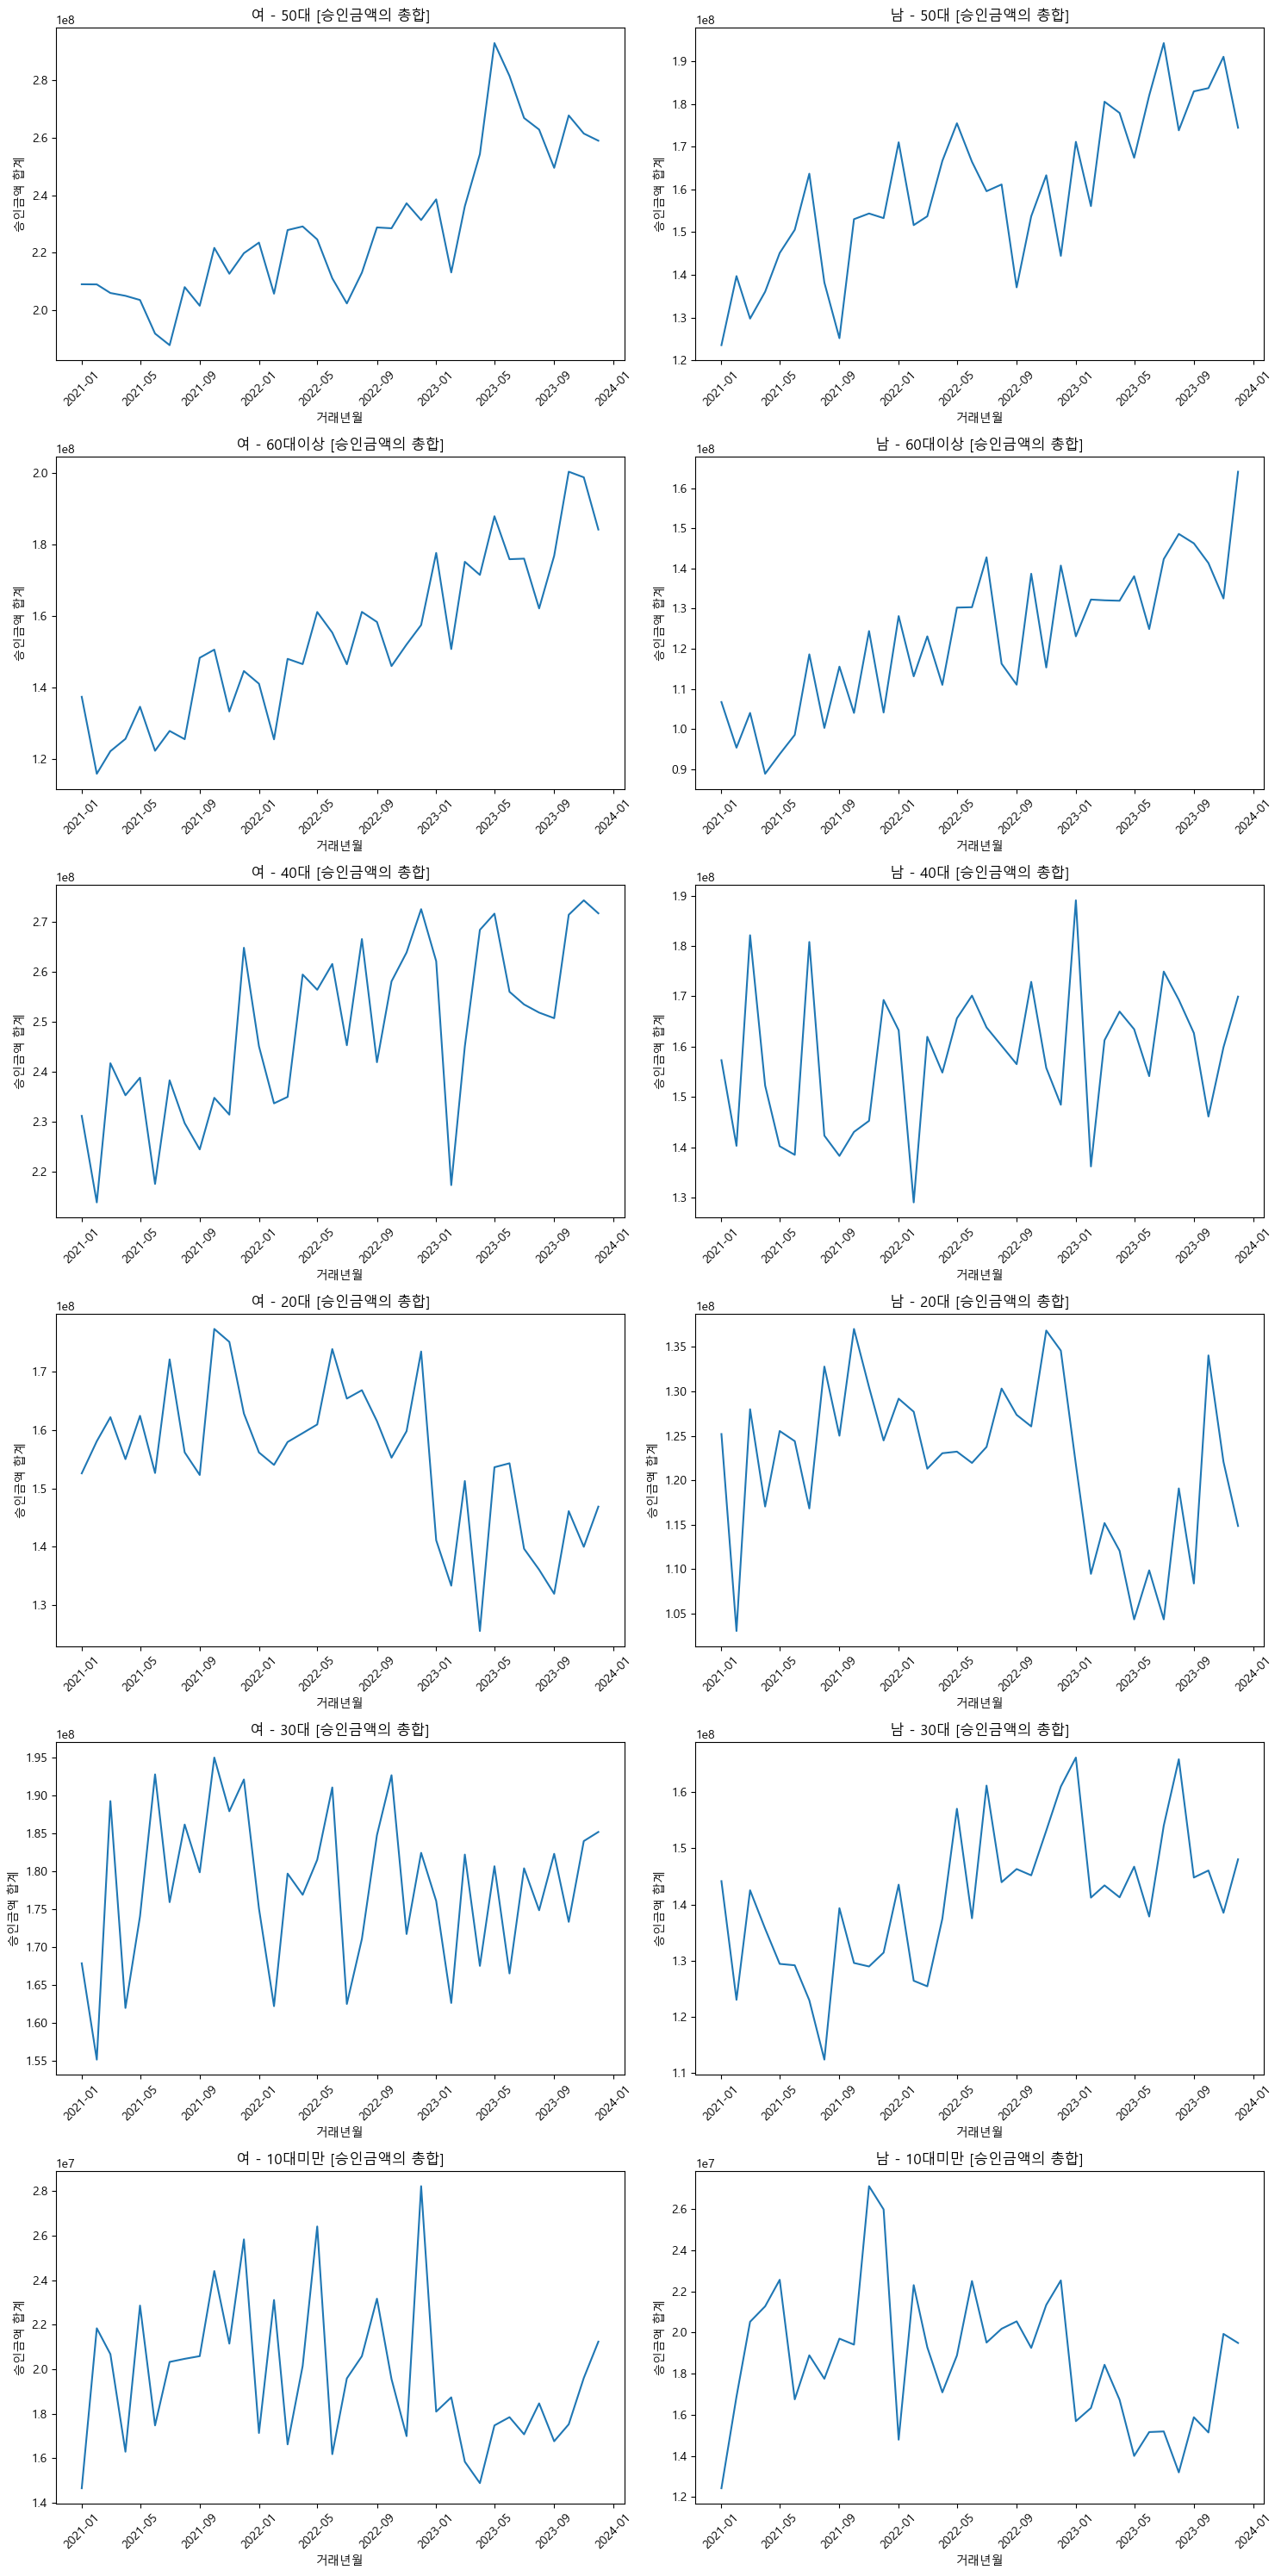

In [22]:
plot_age_gender_amount(data['연령대'].unique(), data['성별'].unique(), data)

In [53]:
def plot_age_gender_amount_2(colname1, colname2, calc = 'sum', data = data, standard = '승인금액'):
    # Create a 6x2 subplot
    fig, axes = plt.subplots(6, 2, figsize=(15, 30))  # 6 rows, 2 columns

    # Plot index 
    plot_idx = 0
    # 연령대 순서 정의
    standard1 = data[colname1].unique()
    standard2 = data[colname2].unique()
    standard1.sort()
    standard2.sort()
    for a in standard1:
        for b in standard2:
            # Filtered DataFrame (subset)
            subset = data[(data[colname1] == a) & (data[colname2] == b)]

            if not subset.empty:
                # Calculate monthly sum of 'standard3'
                if calc == 'sum':
                    monthly_sum_amount = subset.groupby('거래년월')[standard].sum().reset_index()
                elif calc == 'mean':
                    monthly_sum_amount = subset.groupby('거래년월')[standard].mean().reset_index()
                elif calc == 'count':
                    monthly_sum_amount = subset.groupby('거래년월')[standard].count().reset_index()

                # Create line plot in the appropriate subplot
                ax = axes[plot_idx // 2, plot_idx % 2]
                sns.lineplot(data=monthly_sum_amount, x='거래년월', y=standard, ax=ax)
                ax.set_title(f"{b} - {a} [{standard}의 {calc}]")
                ax.set_xlabel("거래년월")
                ax.set_ylabel(f"{standard} {calc}")
                ax.tick_params(axis='x', rotation=45)

                plot_idx += 1

            # Adjust layout
    plt.tight_layout()
    plt.show()

In [54]:
data.columns

Index(['거래년월', '고객ID', '가맹점업종명', '가맹점_광역시도', '가맹점_시군구', '승인건수', '승인금액', '연령대',
       '성별', '고객등급', '자택_시도', '자택_시군구', '승인건수_수치화', '거래년월_분기', '거래월', '년도',
       '가맹점업종명_범주화', '가맹점_인구', '자택_인구'],
      dtype='object')

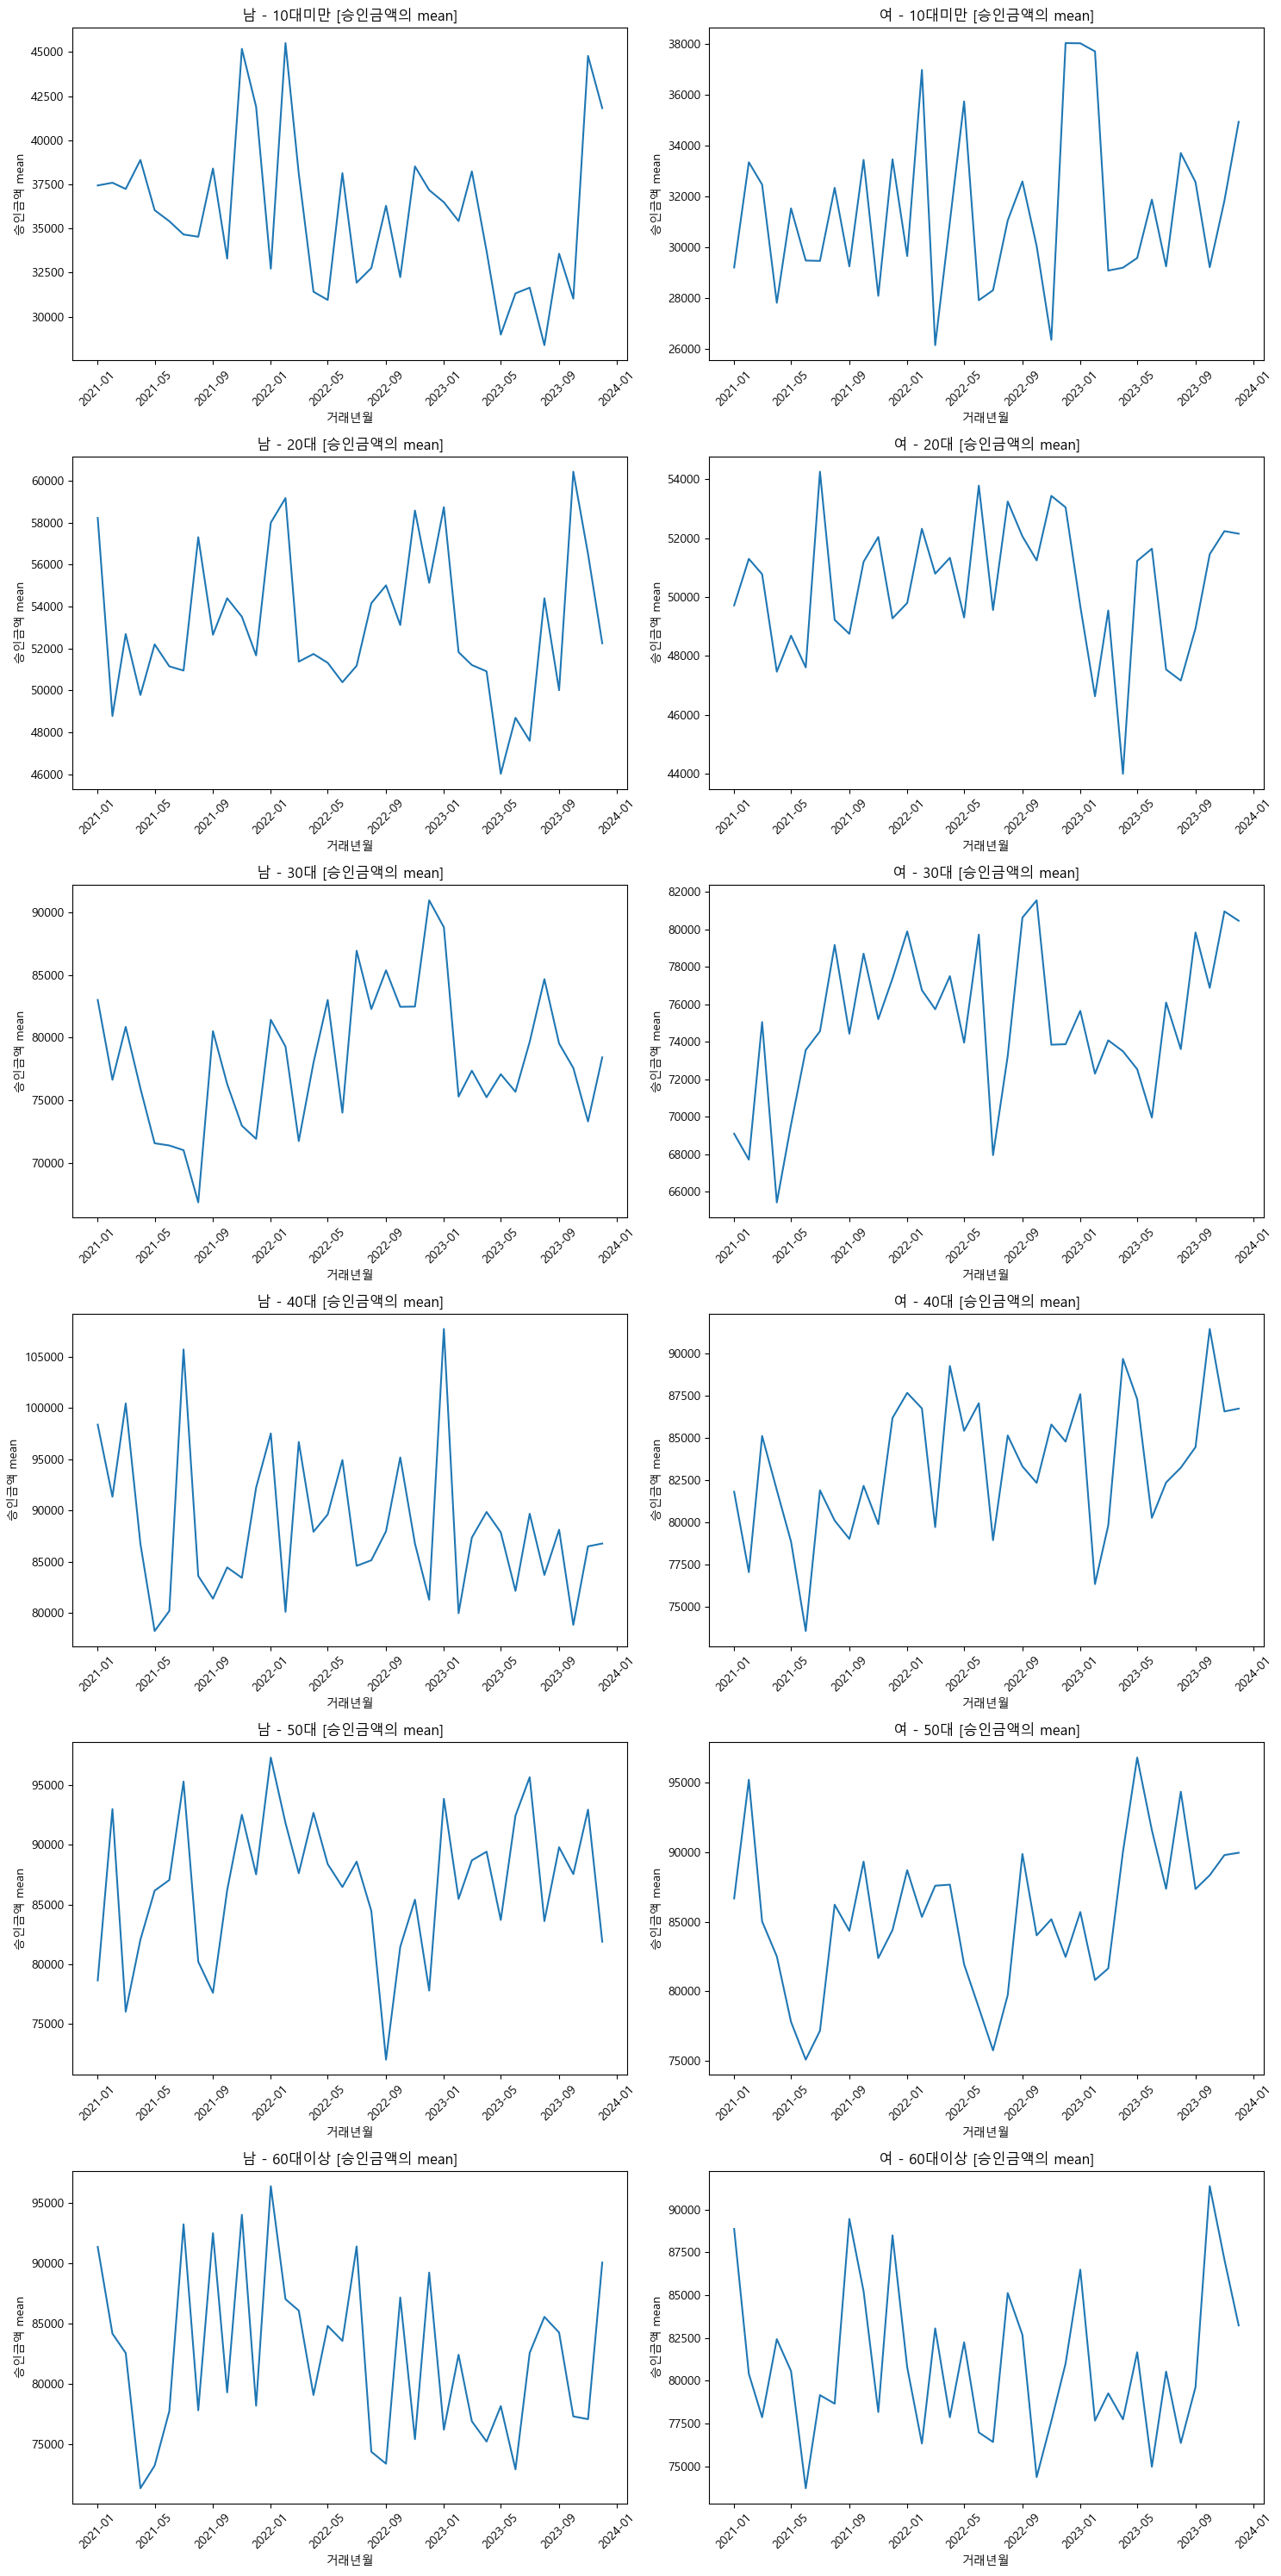

In [55]:
plot_age_gender_amount_2('연령대', '성별', calc = 'mean', standard='승인금액')


# EDA - 지역 그룹화 및 클러스터링
- 지역 위주의 EDA

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841276 entries, 0 to 841275
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   거래년월        841276 non-null  datetime64[ns]
 1   고객ID        841276 non-null  int64         
 2   가맹점업종명      841276 non-null  object        
 3   가맹점_광역시도    841276 non-null  object        
 4   가맹점_시군구     841276 non-null  object        
 5   승인건수        841276 non-null  object        
 6   승인금액        841276 non-null  int64         
 7   연령대         841276 non-null  object        
 8   성별          841276 non-null  object        
 9   고객등급        841276 non-null  object        
 10  자택_시도       841276 non-null  object        
 11  자택_시군구      841276 non-null  object        
 12  승인건수_수치화    841276 non-null  int64         
 13  거래년월_분기     841276 non-null  int64         
 14  거래월         841276 non-null  object        
 15  년도          841276 non-null  int64         
 16  가맹

In [26]:
data.describe()

,거래년월,고객ID,승인금액,승인건수_수치화,거래년월_분기,년도,가맹점_인구,자택_인구
count,841276,8.412760e+05,8.412760e+05,841276.000000,841276.000000,841276.000000,841276.000000,841276.000000
mean,2022-06-26 05:08:50.673881600,6.388503e+09,7.295866e+04,1.093239,2.523154,2022.020396,338356.079175,19558.711749
min,2021-01-01 00:00:00,2.013083e+09,1.000000e+04,1.000000,1.000000,2021.000000,42768.000000,0.000000
25%,2021-10-01 00:00:00,4.775953e+09,1.000000e+04,1.000000,2.000000,2021.000000,122499.000000,0.000000
50%,2022-07-01 00:00:00,6.280704e+09,3.000000e+04,1.000000,3.000000,2022.000000,375675.000000,0.000000
75%,2023-04-01 00:00:00,8.005153e+09,7.000000e+04,1.000000,4.000000,2023.000000,486836.000000,0.000000
max,2023-12-01 00:00:00,9.999810e+09,9.900000e+06,5.000000,4.000000,2023.000000,989676.000000,989676.000000
std,NaN,1.929268e+09,1.919508e+05,0.440396,1.113344,0.815386,185752.032961,99260.967412


In [27]:
data.isnull().sum()

거래년월          0
고객ID          0
가맹점업종명        0
가맹점_광역시도      0
가맹점_시군구       0
승인건수          0
승인금액          0
연령대           0
성별            0
고객등급          0
자택_시도         0
자택_시군구        0
승인건수_수치화      0
거래년월_분기       0
거래월           0
년도            0
가맹점업종명_범주화    0
가맹점_인구        0
자택_인구         0
dtype: int64

In [28]:
data['가맹점업종명_범주화'].value_counts()

가맹점업종명_범주화
인터넷P/G       373541
서비스_및_여가     240497
기타            84930
식생활           80801
교통_및_물류       34965
소매_및_생활용품     26542
Name: count, dtype: int64

In [29]:
data['가맹점업종명'][data['가맹점업종명_범주화']=='인터넷P/G'].value_counts()

가맹점업종명
인터넷P/G    373540
인삼제품           1
Name: count, dtype: int64

# 통계분석
- 지역별 소비 비율은 카이제곱으로
- 지역별 분류 및 클러스터링
- 분류 기준을 잡자

              precision    recall  f1-score   support

           A       1.00      0.50      0.67         8
           B       0.33      0.50      0.40         4
           C       0.40      0.33      0.36         6
           D       0.50      1.00      0.67         3

    accuracy                           0.52        21
   macro avg       0.56      0.58      0.52        21
weighted avg       0.63      0.52      0.53        21



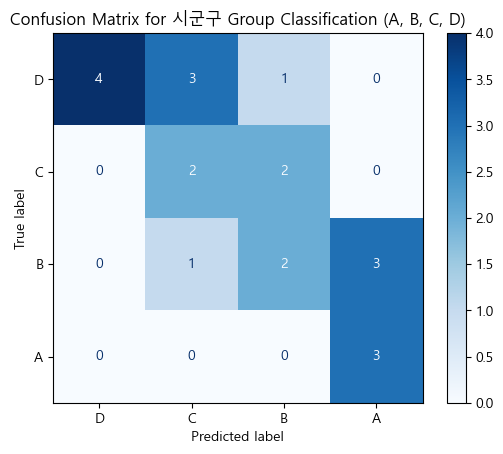

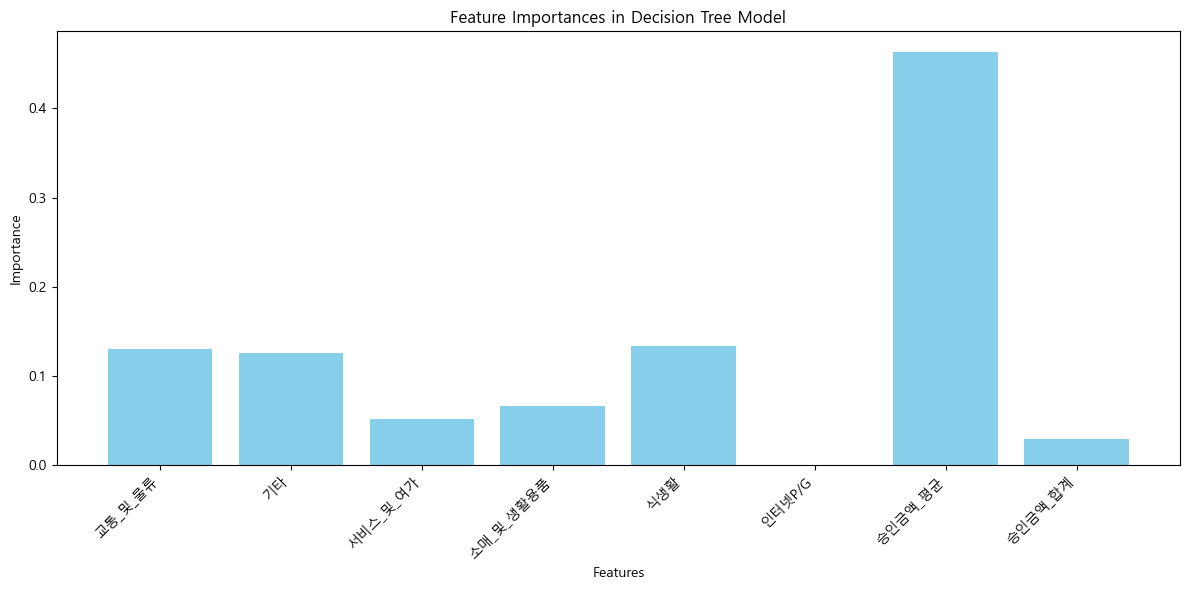

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

def label_data(data):
    # 시군구별 업종 비율 계산
    grouped_ratios = data.groupby(['가맹점_시군구', '가맹점업종명_범주화']).size().unstack(fill_value=0)
    grouped_ratios = grouped_ratios.div(grouped_ratios.sum(axis=1), axis=0)
    
    # 승인금액 정보 추가
    amount_stats = data.groupby('가맹점_시군구').agg({
        '승인금액': ['mean', 'sum']
    })
    # MultiIndex 컬럼을 단일 레벨로 변경
    amount_stats.columns = ['승인금액_평균', '승인금액_합계']
    
    # 데이터 병합
    final_data = pd.concat([grouped_ratios, amount_stats], axis=1)
    
    # 스케일링
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(final_data)
    final_data_scaled = pd.DataFrame(scaled_features, columns=final_data.columns)
    
    # 클러스터링을 위한 레이블 생성
    final_data_scaled['그룹'] = pd.qcut(final_data_scaled.mean(axis=1), q=4, labels=['D', 'C', 'B', 'A'])
    
    return final_data_scaled

# 데이터에 라벨 추가
labeled_data = label_data(data)

# 모든 특성(업종 비율과 승인금액 정보)을 포함하여 X 생성
# '그룹' 컬럼을 제외한 모든 컬럼을 특성으로 사용
X = labeled_data.drop('그룹', axis=1)
y = labeled_data['그룹']

# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 의사결정나무 모델 생성 및 학습
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test, display_labels=['D', 'C', 'B', 'A'], cmap='Blues')
plt.title("Confusion Matrix for 시군구 Group Classification (A, B, C, D)")
plt.show()

# 특성 중요도 시각화
plt.figure(figsize=(12, 6))
plt.bar(X.columns, tree_model.feature_importances_, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Decision Tree Model')
plt.tight_layout()
plt.show()

### T-sne 차원축소 및 시각화 진행
- 가맹점 범주화를 기준으로 업종당 결제 비중이 비슷한 지역끼리 Clustering

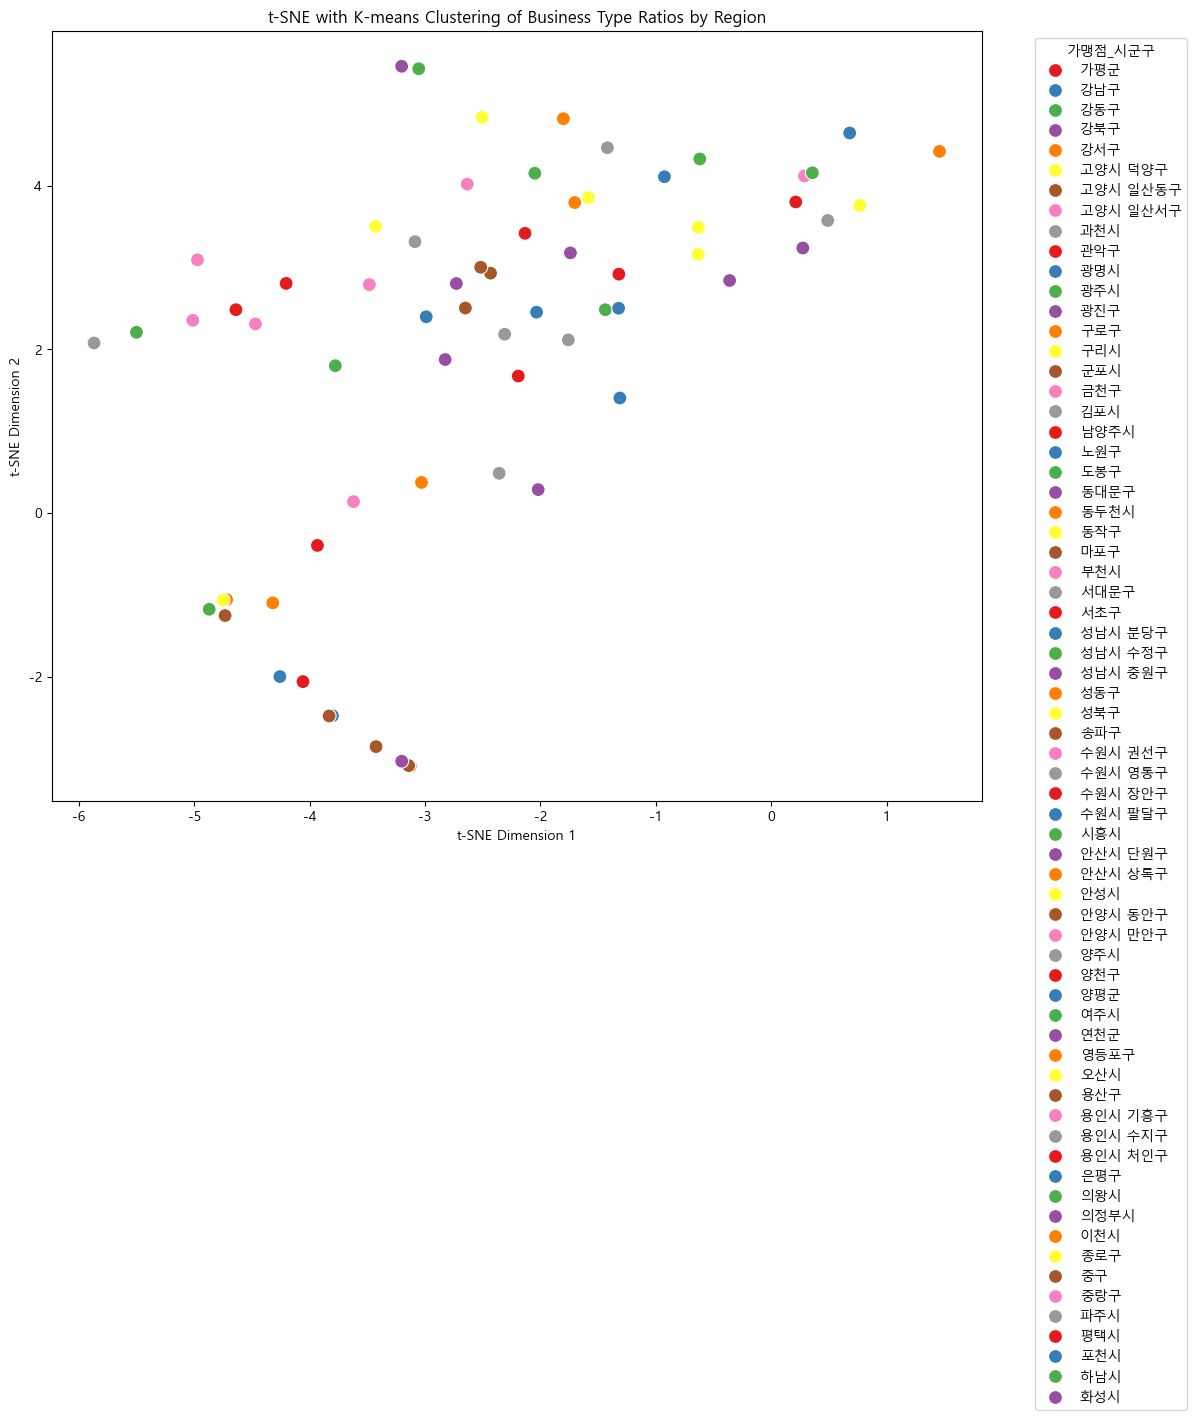

In [31]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# 인터넷P/G를 빼야 할 것 같지만 일단은 넣어서 진행해보자.

dat_sne = data[['가맹점_시군구','가맹점업종명_범주화']]

# 시군구별 가맹점업종명_범주화 비율 계산
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

# t-SNE를 사용하여 차원 축소
tsne = TSNE(n_components=2, random_state=42) #차원을 2개로 축소
tsne_result = tsne.fit_transform(grouped_data)
'''
# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=42)  # 군집 개수 조정 가능
grouped_data['Cluster'] = kmeans.fit_predict(tsne_result)
'''
# t-SNE 결과를 데이터프레임에 추가
grouped_data['t-SNE_1'] = tsne_result[:, 0]
grouped_data['t-SNE_2'] = tsne_result[:, 1]

# 시각화

plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='t-SNE_1', y='t-SNE_2',
    hue = '가맹점_시군구',
    #hue='Cluster',
    palette="Set1",
    data=grouped_data,
    s=100
)
plt.title('t-SNE with K-means Clustering of Business Type Ratios by Region')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='가맹점_시군구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [32]:
# 인터넷P/G를 빼야 할 것 같지만 일단은 넣어서 진행해보자.

dat_sne = data[['가맹점_시군구','가맹점업종명_범주화']]

# 시군구별 가맹점업종명_범주화 비율 계산
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

grouped_data.head(2)

가맹점업종명_범주화,교통_및_물류,기타,서비스_및_여가,소매_및_생활용품,식생활,인터넷P/G
가맹점_시군구,,,,,,
가평군,0.039474,0.000000,0.097368,0.078947,0.784211,0.000000
강남구,0.039879,0.017491,0.374519,0.015512,0.043515,0.509085


In [33]:
# t-SNE를 사용하여 차원 축소
tsne = TSNE(n_components=2, random_state=42) #차원을 2개로 축소
tsne_result = tsne.fit_transform(grouped_data)

In [34]:
# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=42)  # 군집 개수 조정 가능
grouped_data['Cluster'] = kmeans.fit_predict(tsne_result)

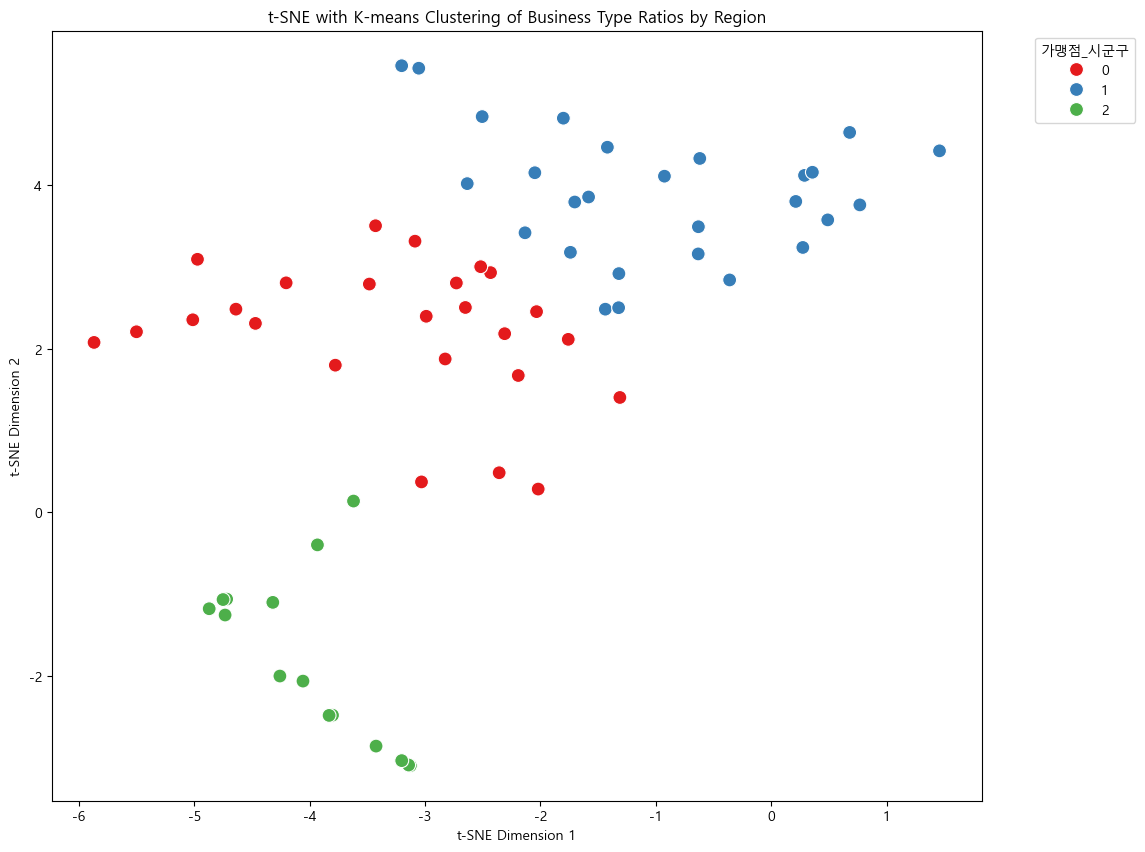

In [35]:
# t-SNE 결과를 데이터프레임에 추가
grouped_data['t-SNE_1'] = tsne_result[:, 0]
grouped_data['t-SNE_2'] = tsne_result[:, 1]

# 시각화

plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='t-SNE_1', y='t-SNE_2',
    hue='Cluster',
    palette="Set1",
    data=grouped_data,
    s=100
)
plt.title('t-SNE with K-means Clustering of Business Type Ratios by Region')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='가맹점_시군구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Umap을 적용해볼 수 있을까?
- 결과가 엄청나게 유의하지는 않을 듯 하다

In [36]:
#pip install umap-learn -qq
#!pip install numpy==2.0 -qq

In [37]:
import umap
from sklearn.cluster import KMeans

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


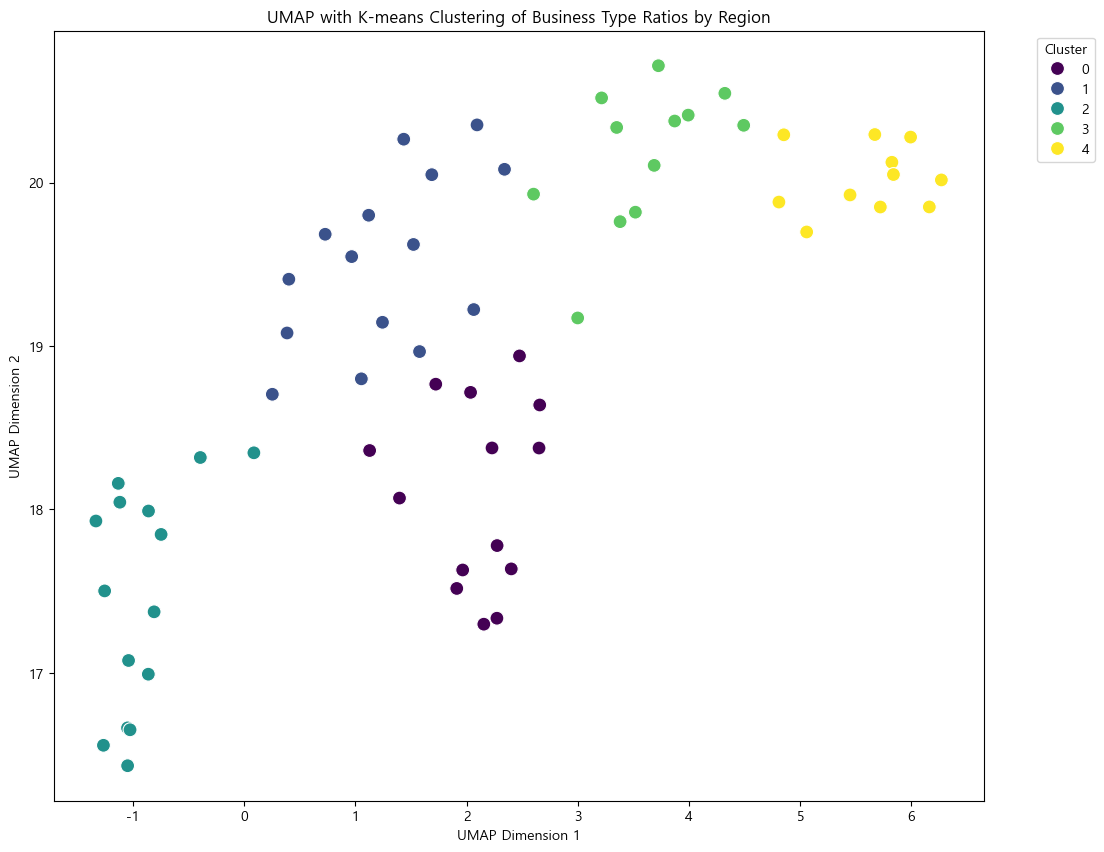

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시군구별 가맹점업종명_범주화 비율 데이터를 활용해 클러스터링

# 시군구별 가맹점업종명_범주화 비율 계산
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

# UMAP 적용
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(grouped_data)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=42)  # 군집 개수 조정 가능
grouped_data['Cluster'] = kmeans.fit_predict(umap_result)

# UMAP 결과에 클러스터 할당
grouped_data['UMAP_1'] = umap_result[:, 0]
grouped_data['UMAP_2'] = umap_result[:, 1]

# 시각화
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='UMAP_1', y='UMAP_2',
    hue='Cluster',
    palette="viridis",
    data=grouped_data,
    s=100
)
plt.title('UMAP with K-means Clustering of Business Type Ratios by Region')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# UMAP 적용으로 데이터 그룹화

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


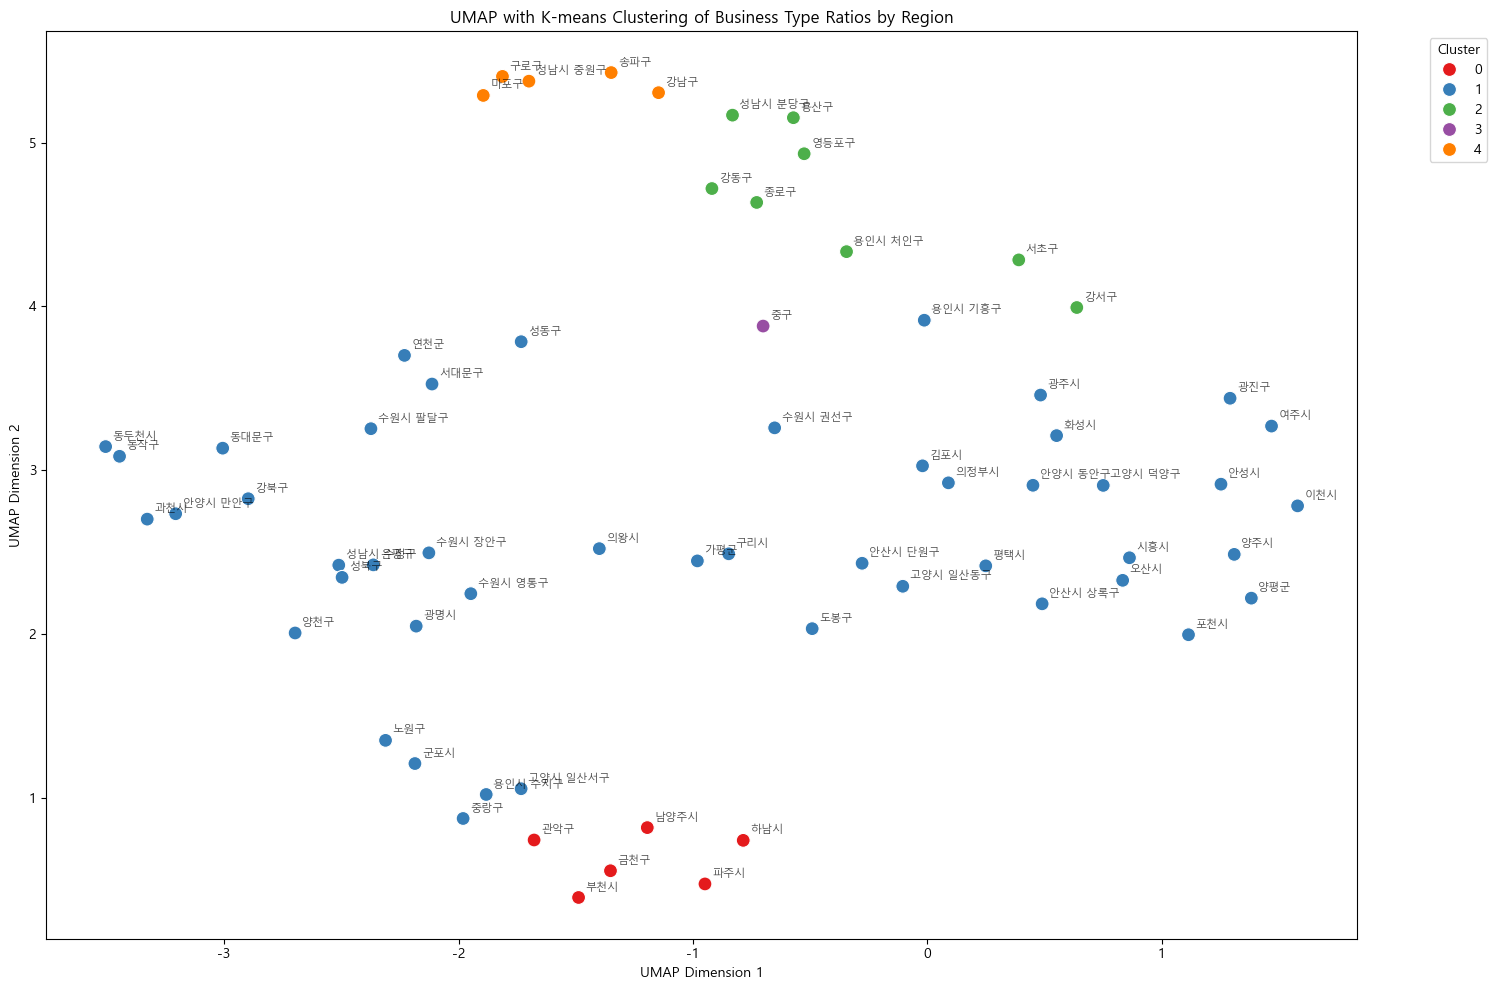


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 지역 수: 6

주요 업종 비율:
식생활: 49.1%
소매_및_생활용품: 35.6%
서비스_및_여가: 10.5%
교통_및_물류: 2.4%
인터넷P/G: 1.3%
기타: 1.1%

대표적인 지역:
관악구, 금천구, 남양주시, 부천시, 파주시
--------------------------------------------------

Cluster 1 특징:
포함된 지역 수: 47

주요 업종 비율:
식생활: 69.4%
소매_및_생활용품: 13.4%
서비스_및_여가: 12.9%
교통_및_물류: 3.9%
기타: 0.4%
인터넷P/G: 0.0%

대표적인 지역:
가평군, 강북구, 고양시 덕양구, 고양시 일산동구, 고양시 일산서구
--------------------------------------------------

Cluster 2 특징:
포함된 지역 수: 8

주요 업종 비율:
서비스_및_여가: 58.7%
식생활: 17.2%
인터넷P/G: 10.6%
소매_및_생활용품: 7.0%
교통_및_물류: 5.4%
기타: 1.1%

대표적인 지역:
강동구, 강서구, 서초구, 성남시 분당구, 영등포구
--------------------------------------------------

Cluster 3 특징:
포함된 지역 수: 1

주요 업종 비율:
인터넷P/G: 36.3%
기타: 29.2%
서비스_및_여가: 20.6%
교통_및_물류: 7.2%
식생활: 5.8%
소매_및_생활용품: 0.9%

대표적인 지역:
중구
--------------------------------------------------

Cluster 4 특징:
포함된 지역 수: 5

주요 업종 비율:
인터넷P/G: 74.5%
서비스_및_여가: 14.5%
식생활: 7.2%
소매_및_생활용품: 2.6%
교통_및_물류: 0.9%
기타: 0.4%

대표적인 지역:
강남구, 구로구, 마포구, 성남시 중원구, 송파구
------------

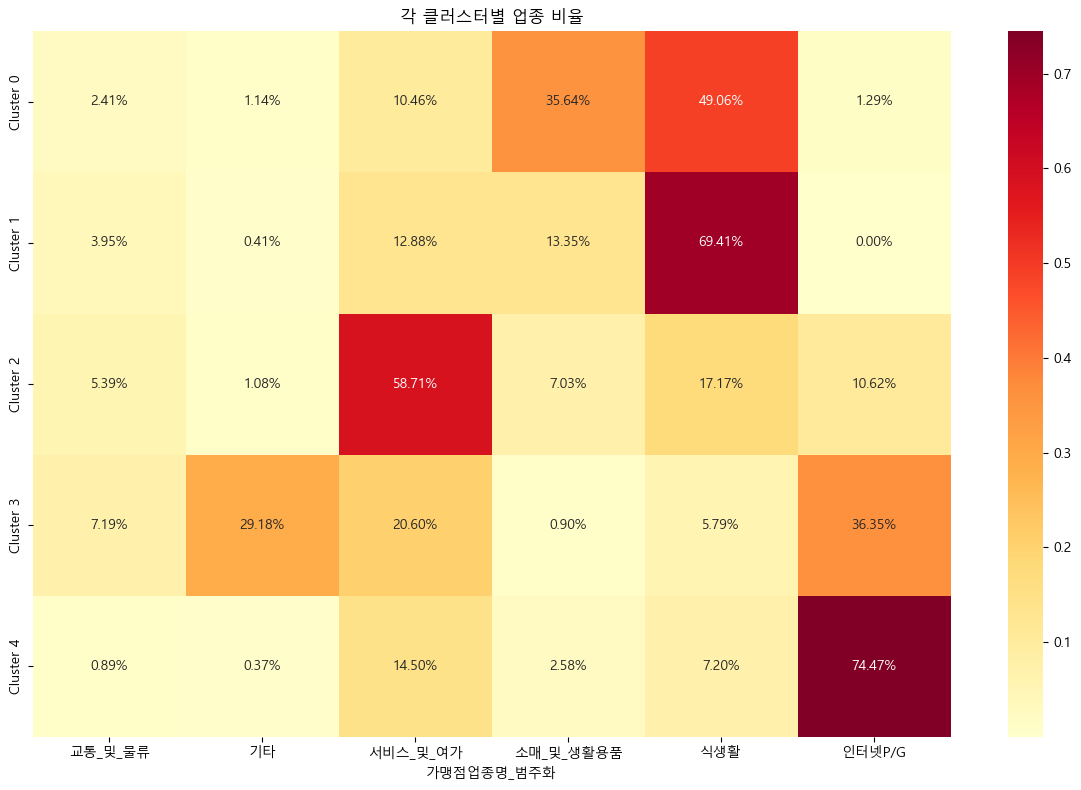

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 전처리
# 시군구별 가맹점업종명_범주화 비율 계산
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped_data)
scaled_data = pd.DataFrame(scaled_data, columns=grouped_data.columns, index=grouped_data.index)

# UMAP 적용
umap_reducer = umap.UMAP(
    n_components=2,
    random_state=42,
    n_neighbors=15,
    min_dist=0.1
)
umap_result = umap_reducer.fit_transform(scaled_data)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 결과 데이터프레임 생성
result_df = pd.DataFrame({
    'UMAP_1': umap_result[:, 0],
    'UMAP_2': umap_result[:, 1],
    'Cluster': clusters
})
result_df.index = grouped_data.index

# 시각화
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(
    data=result_df,
    x='UMAP_1',
    y='UMAP_2',
    hue='Cluster',
    palette='Set1',
    s=100
)

# 시군구 이름 표시
for idx, row in result_df.iterrows():
    plt.annotate(idx, (row['UMAP_1'], row['UMAP_2']), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8, alpha=0.7)

plt.title('UMAP with K-means Clustering of Business Type Ratios by Region')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 각 클러스터의 특징 분석
print("\n=== 각 클러스터의 특징 ===\n")
for cluster in range(5):
    cluster_regions = result_df[result_df['Cluster'] == cluster].index
    cluster_means = grouped_data.loc[cluster_regions].mean()
    
    print(f"\nCluster {cluster} 특징:")
    print(f"포함된 지역 수: {len(cluster_regions)}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means.sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    
    print("\n대표적인 지역:")
    print(", ".join(cluster_regions[:5]))
    print("-" * 50)

# 클러스터별 업종 비율 히트맵
plt.figure(figsize=(12, 8))
cluster_means = pd.DataFrame([
    grouped_data.loc[result_df[result_df['Cluster'] == i].index].mean()
    for i in range(5)
], index=[f'Cluster {i}' for i in range(5)])

sns.heatmap(cluster_means, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('각 클러스터별 업종 비율')
plt.tight_layout()
plt.show()

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


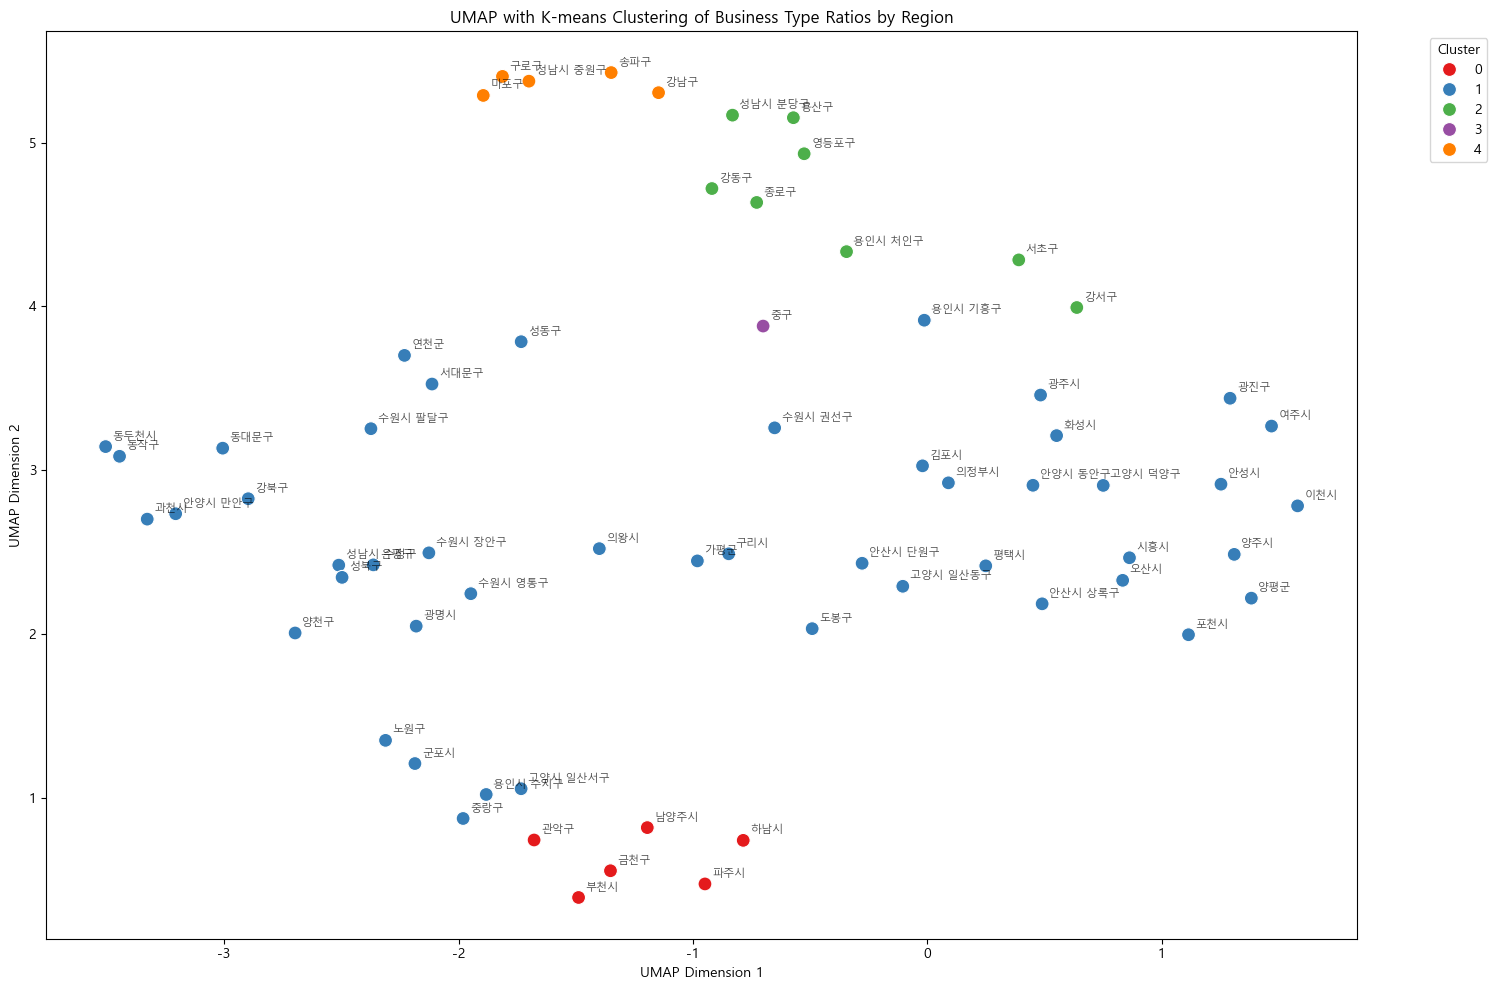


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 지역 수: 6

주요 업종 비율:
식생활: 49.1%
소매_및_생활용품: 35.6%
서비스_및_여가: 10.5%
교통_및_물류: 2.4%
인터넷P/G: 1.3%
기타: 1.1%

대표적인 지역:
관악구, 금천구, 남양주시, 부천시, 파주시
--------------------------------------------------

Cluster 1 특징:
포함된 지역 수: 47

주요 업종 비율:
식생활: 69.4%
소매_및_생활용품: 13.4%
서비스_및_여가: 12.9%
교통_및_물류: 3.9%
기타: 0.4%
인터넷P/G: 0.0%

대표적인 지역:
가평군, 강북구, 고양시 덕양구, 고양시 일산동구, 고양시 일산서구
--------------------------------------------------

Cluster 2 특징:
포함된 지역 수: 8

주요 업종 비율:
서비스_및_여가: 58.7%
식생활: 17.2%
인터넷P/G: 10.6%
소매_및_생활용품: 7.0%
교통_및_물류: 5.4%
기타: 1.1%

대표적인 지역:
강동구, 강서구, 서초구, 성남시 분당구, 영등포구
--------------------------------------------------

Cluster 3 특징:
포함된 지역 수: 1

주요 업종 비율:
인터넷P/G: 36.3%
기타: 29.2%
서비스_및_여가: 20.6%
교통_및_물류: 7.2%
식생활: 5.8%
소매_및_생활용품: 0.9%

대표적인 지역:
중구
--------------------------------------------------

Cluster 4 특징:
포함된 지역 수: 5

주요 업종 비율:
인터넷P/G: 74.5%
서비스_및_여가: 14.5%
식생활: 7.2%
소매_및_생활용품: 2.6%
교통_및_물류: 0.9%
기타: 0.4%

대표적인 지역:
강남구, 구로구, 마포구, 성남시 중원구, 송파구
------------

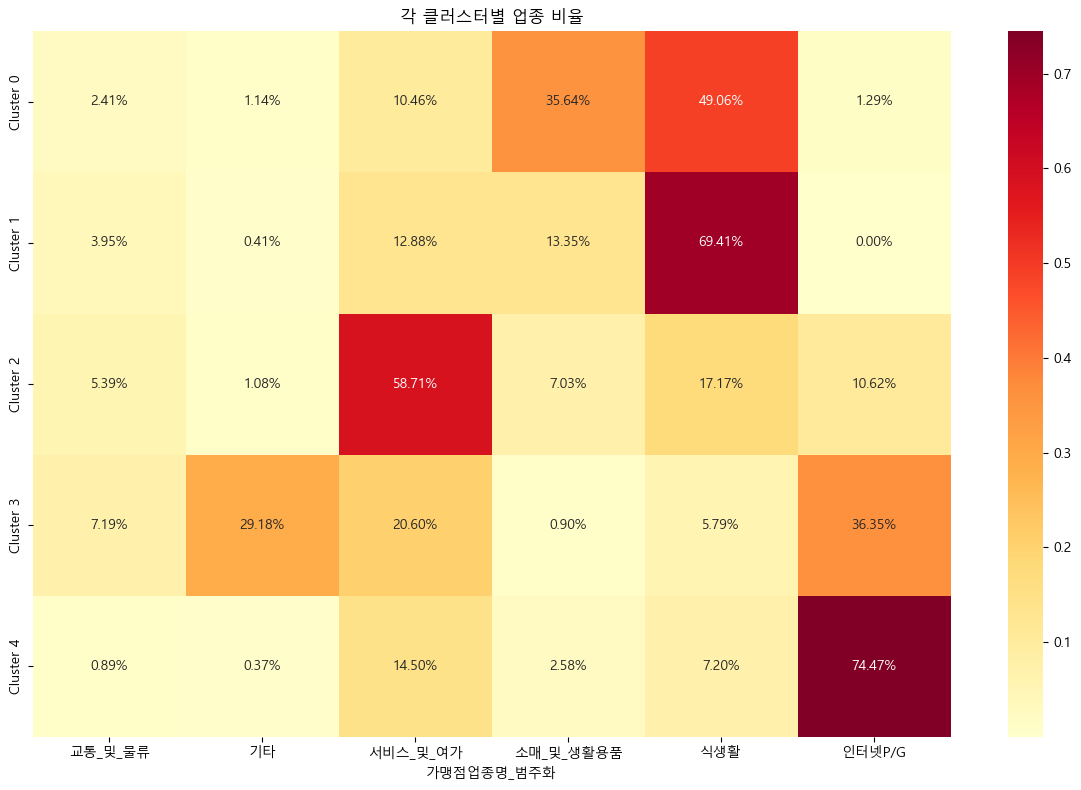

In [40]:
# 데이터 전처리
# 시군구별 가맹점업종명_범주화 비율 계산
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped_data)
scaled_data = pd.DataFrame(scaled_data, columns=grouped_data.columns, index=grouped_data.index)

# UMAP 적용
umap_reducer = umap.UMAP(
    n_components=2,
    random_state=42,
    n_neighbors=15,
    min_dist=0.1
)
umap_result = umap_reducer.fit_transform(scaled_data)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 결과 데이터프레임 생성
result_df = pd.DataFrame({
    'UMAP_1': umap_result[:, 0],
    'UMAP_2': umap_result[:, 1],
    'Cluster': clusters
})
result_df.index = grouped_data.index

# 시각화
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(
    data=result_df,
    x='UMAP_1',
    y='UMAP_2',
    hue='Cluster',
    palette='Set1',
    s=100
)

# 시군구 이름 표시
for idx, row in result_df.iterrows():
    plt.annotate(idx, (row['UMAP_1'], row['UMAP_2']), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8, alpha=0.7)

plt.title('UMAP with K-means Clustering of Business Type Ratios by Region')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 각 클러스터의 특징 분석
print("\n=== 각 클러스터의 특징 ===\n")
for cluster in range(5):
    cluster_regions = result_df[result_df['Cluster'] == cluster].index
    cluster_means = grouped_data.loc[cluster_regions].mean()
    
    print(f"\nCluster {cluster} 특징:")
    print(f"포함된 지역 수: {len(cluster_regions)}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means.sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    
    print("\n대표적인 지역:")
    print(", ".join(cluster_regions[:5]))
    print("-" * 50)

# 클러스터별 업종 비율 히트맵
plt.figure(figsize=(12, 8))
cluster_means = pd.DataFrame([
    grouped_data.loc[result_df[result_df['Cluster'] == i].index].mean()
    for i in range(5)
], index=[f'Cluster {i}' for i in range(5)])

sns.heatmap(cluster_means, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('각 클러스터별 업종 비율')
plt.tight_layout()
plt.show()

# 소비 패턴 파악
- 패턴 파악을 먼저
- 

### 차이검정 (Difference Test)

**차이검정**이란 두 개 이상의 집단에서 얻어진 데이터의 평균이나 분포에 차이가 있는지를 통계적으로 검정하는 기법입니다. 이 방법은 연구자가 **A/B 테스트**를 하거나, **집단 간 비교**를 할 때 주로 사용됩니다. 예를 들어, 새로운 광고 캠페인이 기존 캠페인보다 효과적인지 확인할 때, 또는 두 약물의 효과 차이를 비교할 때 유용합니다.

### 주요 차이검정 기법

1. **t-검정 (t-test)**
   - **독립표본 t-검정**: 서로 다른 두 집단의 평균을 비교할 때 사용합니다. 예를 들어, 남성과 여성의 키 평균 차이를 검정할 때.
   - **대응표본 t-검정 (paired t-test)**: 동일한 집단에서 두 번 측정한 데이터를 비교할 때 사용합니다. 예를 들어, 다이어트 전후의 체중 변화 비교.
   - **단일표본 t-검정 (one-sample t-test)**: 표본 평균이 특정 기준값과 다른지를 검정합니다.

2. **ANOVA (분산분석)**
   - 세 개 이상의 집단 간 평균 차이를 비교할 때 사용합니다. 예를 들어, 세 개의 마케팅 전략이 서로 다른 성과를 보이는지를 검정할 때.
   - **일원분산분석 (One-way ANOVA)**: 한 가지 독립변수에 대해 집단 간 차이를 분석.
   - **이원분산분석 (Two-way ANOVA)**: 두 가지 독립변수 간의 상호작용 효과를 분석.

3. **카이제곱 검정 (Chi-square test)**
   - 명목형 데이터 간의 분포 차이를 검정할 때 사용합니다. 예를 들어, 성별에 따라 선호하는 브랜드가 다른지를 분석할 때.
   - **적합도 검정**과 **독립성 검정**이 대표적입니다.

4. **Mann-Whitney U 검정**
   - 두 집단의 분포가 동일한지를 비교하는 비모수 검정입니다. 데이터가 정규분포를 따르지 않는 경우 사용합니다.

5. **Wilcoxon Signed-Rank Test**
   - 대응표본에 대해 비모수 검정을 수행합니다. 예를 들어, 약물 사용 전후의 통증 점수 비교 시.

6. **Kruskal-Wallis Test**
   - ANOVA의 비모수 버전으로, 세 개 이상의 독립 집단 간 차이를 검정합니다.

### 차이검정의 기본 가정

1. **정규성 가정**: 데이터가 정규분포를 따른다고 가정합니다. 정규성을 만족하지 않을 경우 비모수 검정을 사용합니다.
2. **등분산성 가정**: 각 집단의 분산이 동일하다고 가정합니다. 이 가정이 충족되지 않으면 Welch의 t-검정을 사용할 수 있습니다.
3. **독립성 가정**: 비교하고자 하는 집단이 서로 독립적이어야 합니다.

### 예시

#### 예시 1: 독립표본 t-검정
- 문제: A 마케팅 캠페인과 B 마케팅 캠페인의 전환율 차이를 비교하고 싶습니다.
- 검정 방법: 독립표본 t-검정을 사용하여 두 집단의 전환율 평균 차이를 검정합니다.

#### 예시 2: 대응표본 t-검정
- 문제: 신약을 투여하기 전과 후의 혈압 변화를 비교하고 싶습니다.
- 검정 방법: 대응표본 t-검정을 사용하여 동일한 집단의 두 시점 간 평균 차이를 분석합니다.

### 주의사항

- **p-value**: 차이검정에서 중요한 요소로, 귀무가설이 참이라는 가정 하에 현재 데이터를 관찰할 확률입니다. 일반적으로 p-value가 0.05 이하이면 귀무가설을 기각하고 유의미한 차이가 있다고 판단합니다.
- **효과 크기**: 차이가 통계적으로 유의미하더라도 실제 효과 크기가 작으면 실무에 의미가 없을 수 있습니다.

### 정리

차이검정은 집단 간의 차이를 분석하고 해석하는 데 필수적인 통계 기법입니다. 데이터의 분포와 연구 목적에 따라 적절한 차이검정 방법을 선택하는 것이 중요합니다.

In [41]:
fig, ax = figure(2,6,figsize = (20,30))



plt.show()

NameError: name 'figure' is not defined